In [28]:
options(jupyter.plot_scale=1,
        width=200,
        repr.matrix.max.cols=200,
        repr.matrix.max.rows=Inf)

In [29]:
require(Matrix)
require(qlcMatrix)

In [100]:
source("betaDistance.R")

In [41]:
source("powerDistance.R")

In [52]:
source("sigmoidDistance.R")

In [ ]:
source("SparseSpearmanCor2.R")

In [ ]:
source("SparsifiedRanks2.R")

In [ ]:
source("estimateShape.R")

# betaDistance.R

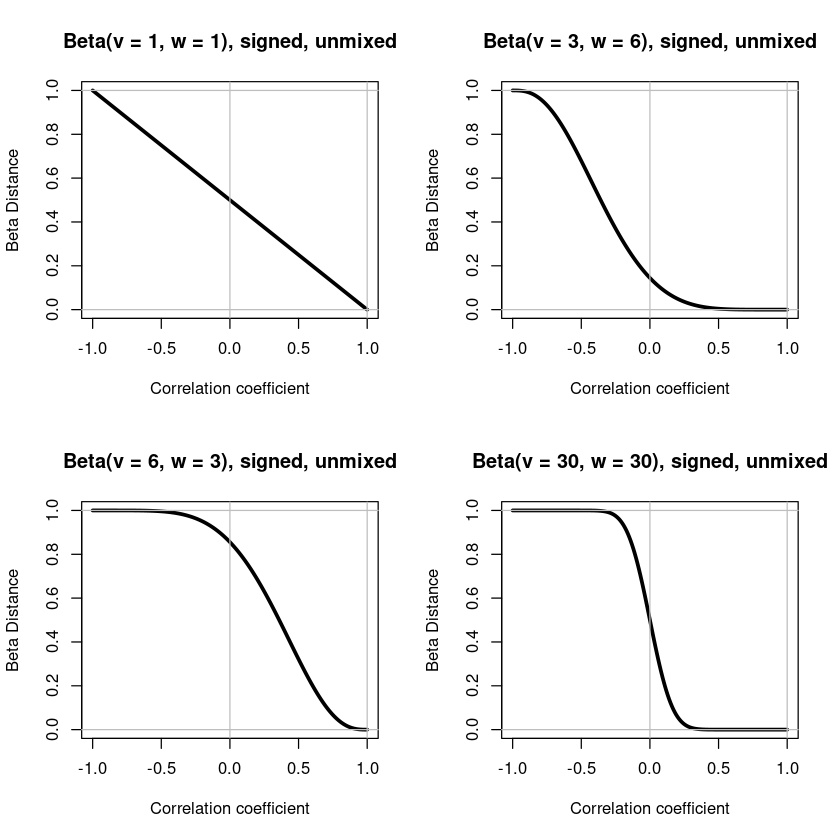

In [112]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=0, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=0,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), signed, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

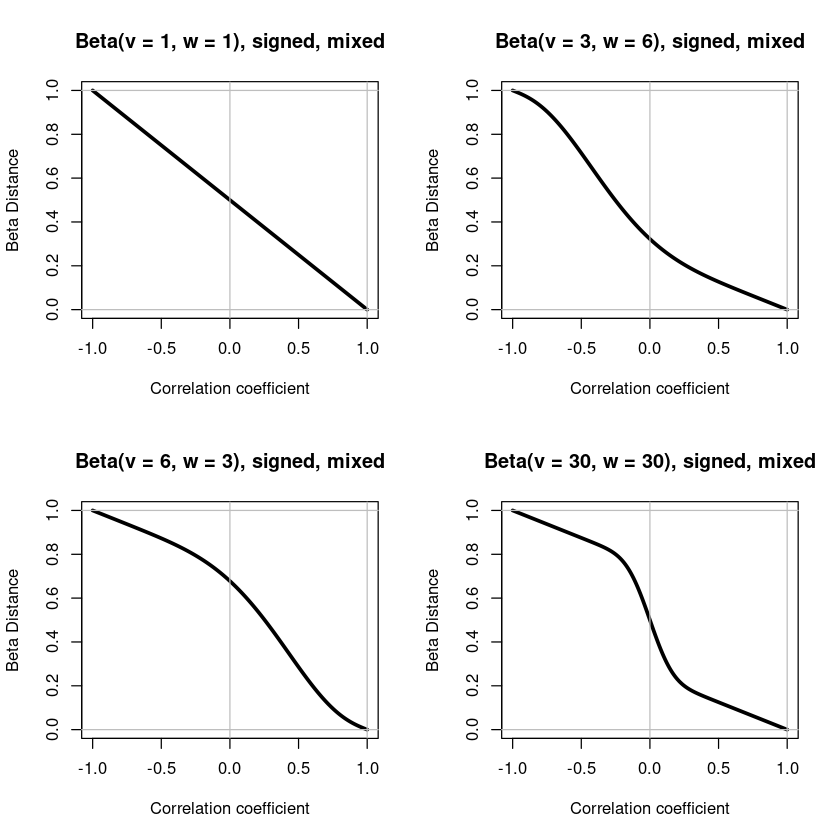

In [113]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=1, unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), signed, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

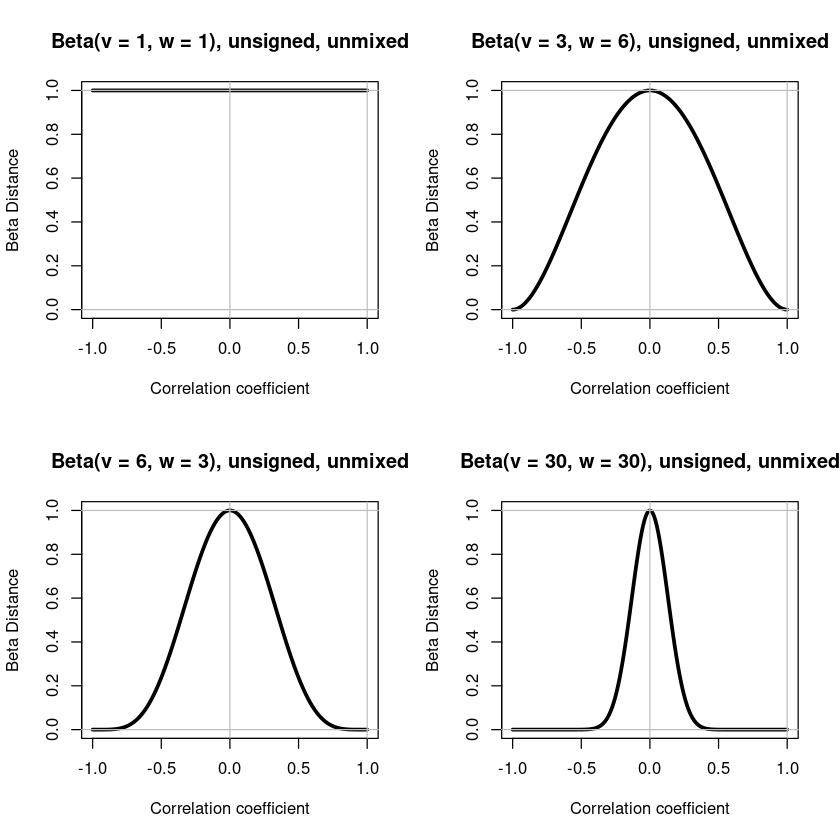

In [114]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1,mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6, mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3, mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30,mix=0),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), unsigned, unmixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

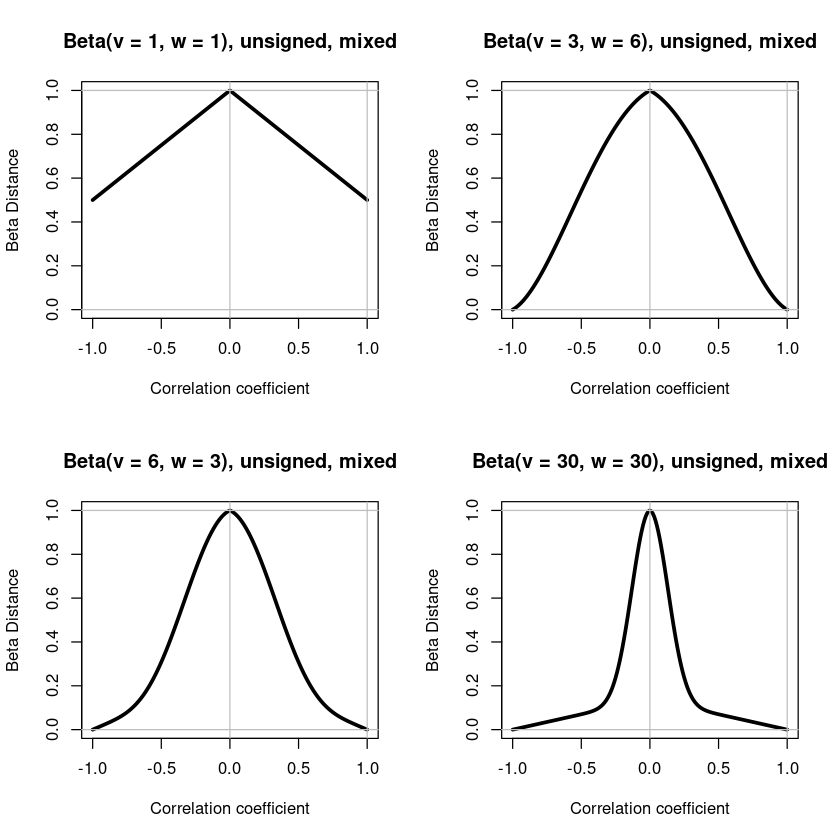

In [117]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,betaDistance(R,1,1),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 1, w = 1), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 3, 6),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 3, w = 6), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 6, 3),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 6, w = 3), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, 30, 30),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = "Beta(v = 30, w = 30), unsigned, mixed")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

# powerDistance.R

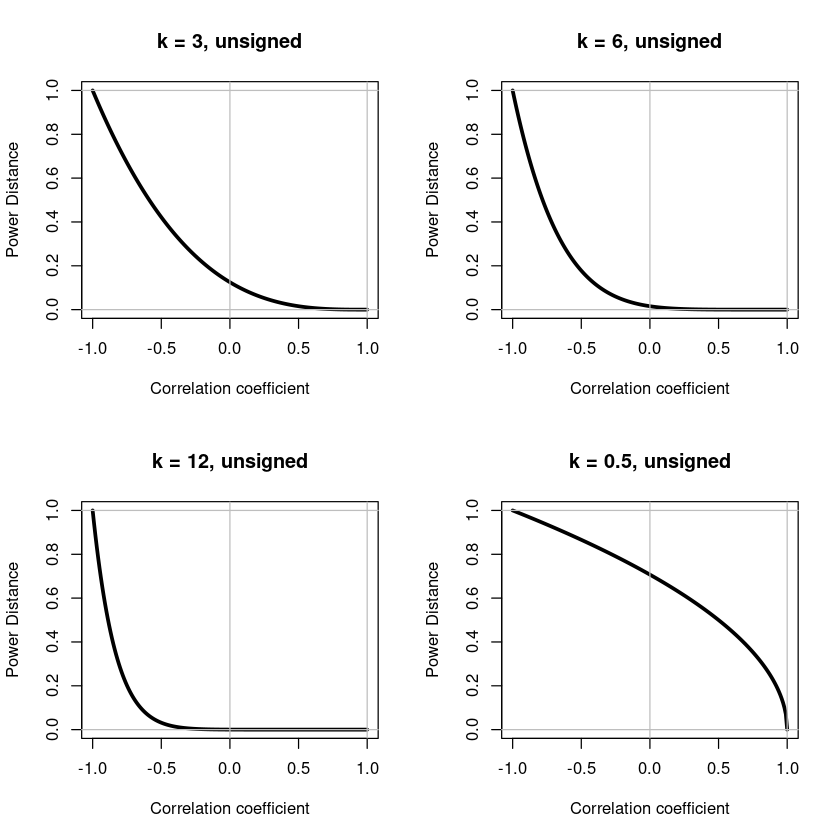

In [118]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,powerDistance(R,k=3,unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 3, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=6, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 6, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=12, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 12, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=0.5, unsigned=FALSE),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 0.5, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

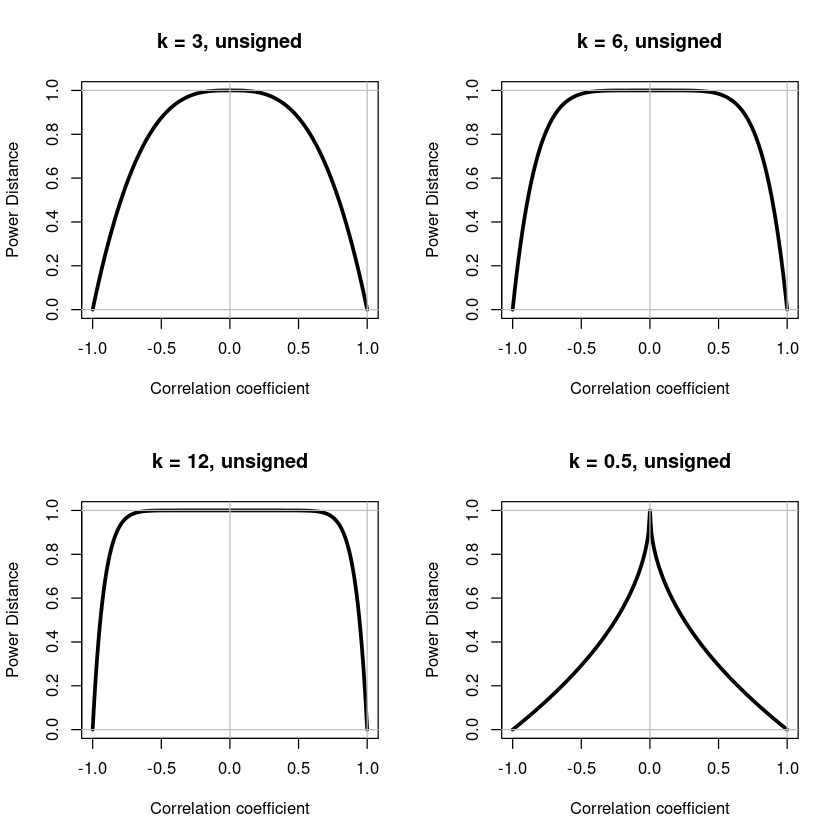

In [119]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,powerDistance(R,k=3),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 3, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=6),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 6, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=12),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 12, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,powerDistance(R,k=0.5),type='l',lwd=3, ylim=c(0,1),
     xlab="Correlation coefficient", ylab="Power Distance",
    main = "k = 0.5, unsigned")
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

# sigmoidDistance.R

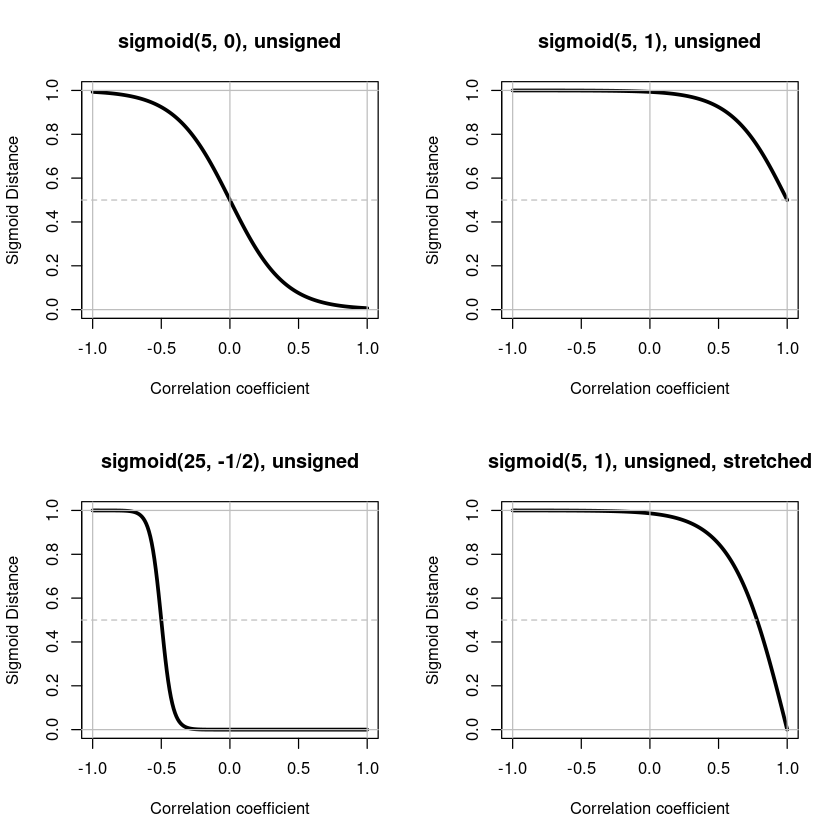

In [127]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=5,tau0 = 0,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 0), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=5,tau0 = 1,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 1), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=25,tau0 = -0.5,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(25, -1/2), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=5,tau0 = 1,unsigned=FALSE, stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(5, 1), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


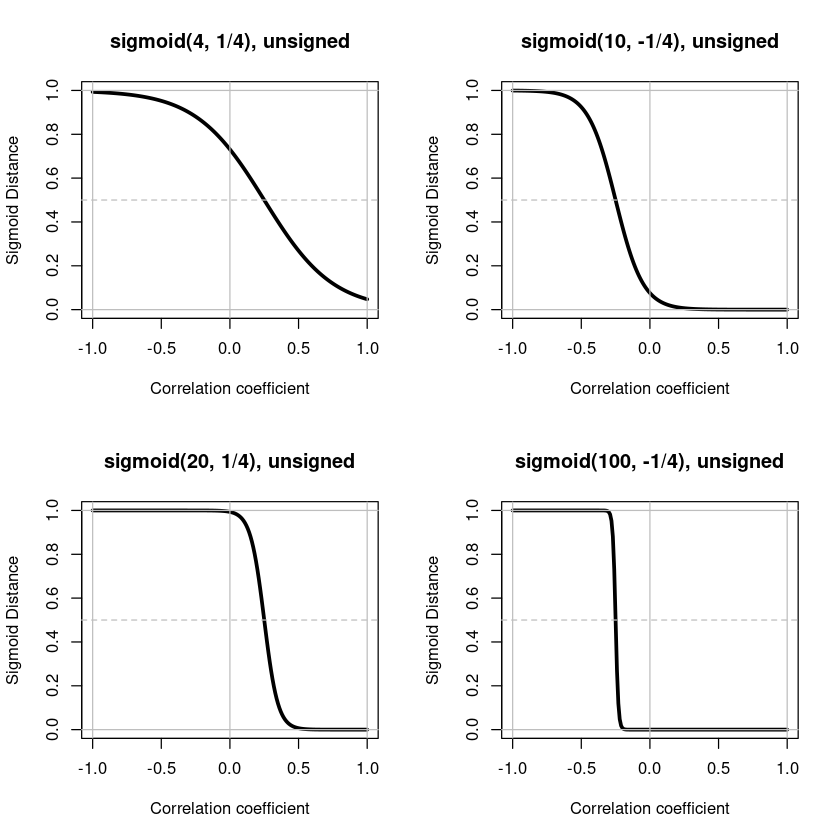

In [128]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=4,tau0 = 1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(4, 1/4), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=10,tau0 = -1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(10, -1/4), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=20,tau0 = 1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(20, 1/4), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=100,tau0 = -1/4,unsigned=FALSE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(100, -1/4), unsigned",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


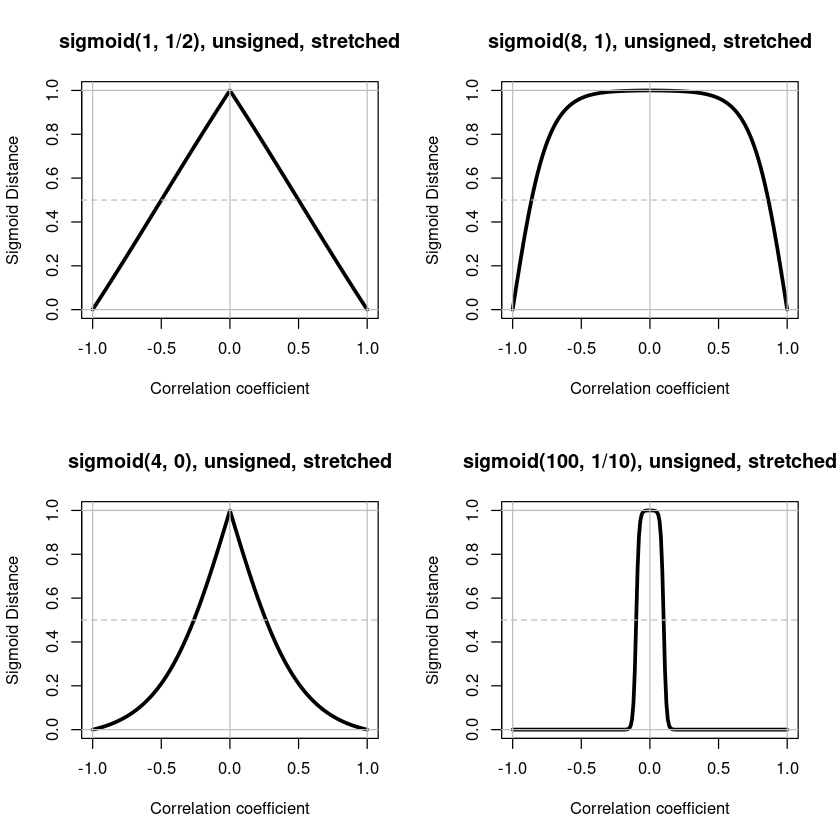

In [129]:
R <- c(-100:100)/100 ; R <- ifelse(R < -1, -1, ifelse(1 < R, 1, R))

par(mfrow=c(2,2))

plot(R,sigmoidDistance(R,alpha=1,tau0 = 1/2,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(1, 1/2), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=8,tau0 = 1,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(8, 1), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=4,tau0 = 0,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(4, 0), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')

plot(R,sigmoidDistance(R,alpha=100,tau0 = 1/10,unsigned=TRUE,stretch=TRUE),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Sigmoid Distance",
    main = "sigmoid(100, 1/10), unsigned, stretched",ylim=c(0,1))
abline(v=c(-1:1),col='grey') ; abline(h=c(0,1),col='grey')
abline(h=0.5, lty=2, col='grey')


# estimateShape.R

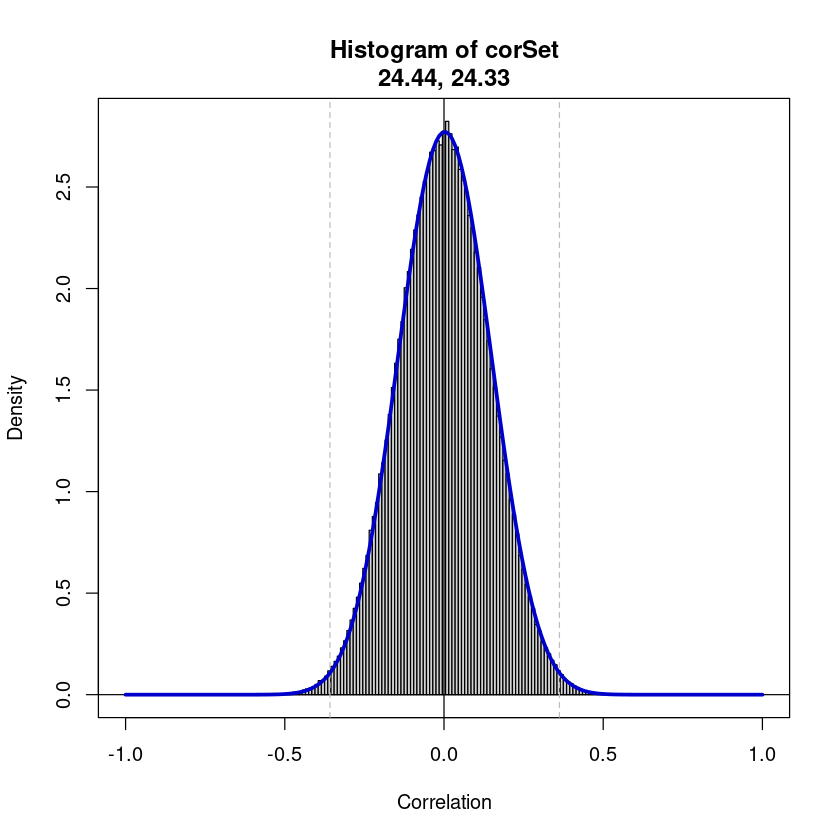

In [110]:
Samples <- 1000
Dimensions <- 50
M <- Matrix(rnorm(Dimensions*Samples),nrow=Dimensions,ncol=Samples,sparse=TRUE)
Z <- SparseSpearmanCor2(M)

beta.shape <- estimateShape(Z[row(Z) < col(Z)], plot=TRUE)
title(paste(round(beta.shape,2),collapse=", "),line=0.5)


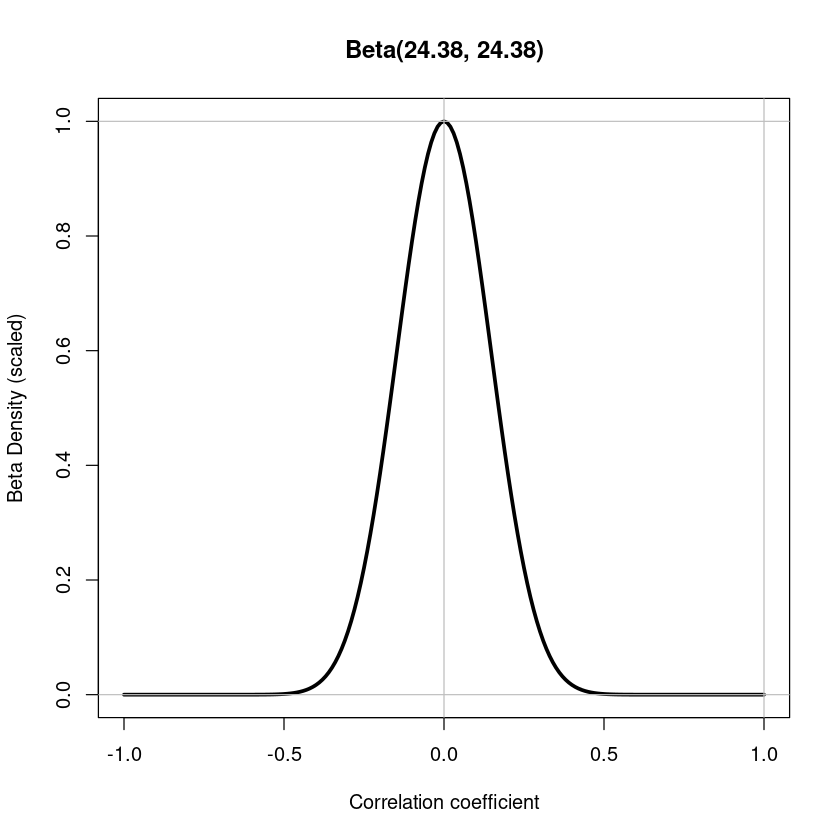

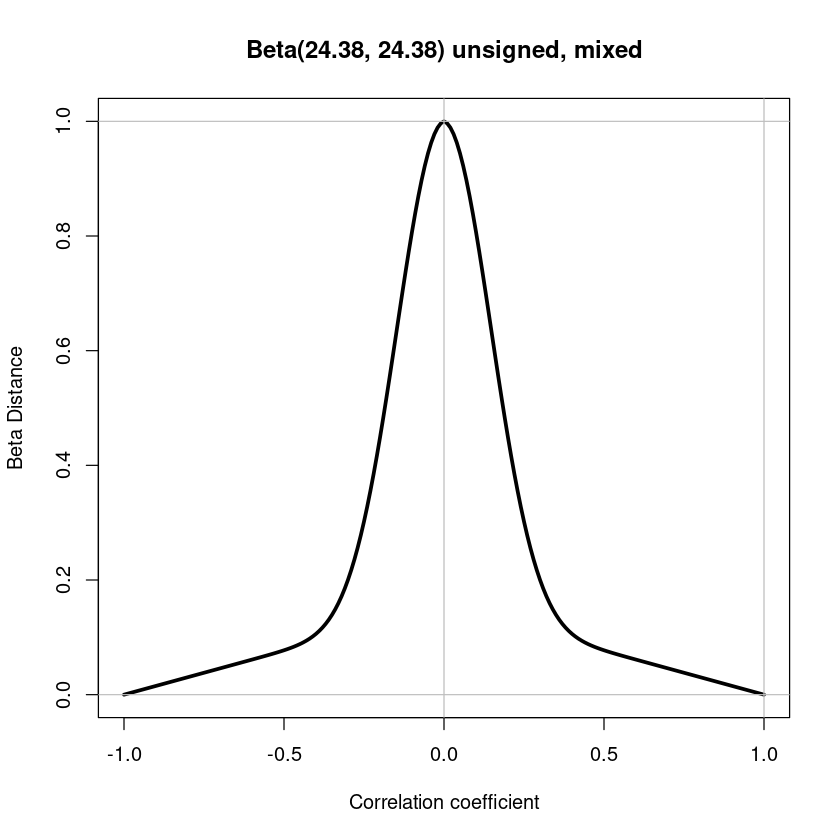

In [111]:
v <- mean(beta.shape) # Expect v = (D-1)/2 = 24.5
v.name <- paste("Beta(",paste(round(c(v,v),2),collapse=", "),")",sep='')
plot(R,betaDistance(R, v, v, mix=0), type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Density (scaled)",
    main = v.name)
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')

plot(R,betaDistance(R, v, v, mix=1),type='l',lwd=3,
     xlab="Correlation coefficient", ylab="Beta Distance",
    main = paste(v.name, "unsigned, mixed"))
abline(h=c(-1:1),col='grey') ; abline(v=c(0,1),col='grey')